In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import os

print("Packages Imported")

Packages Imported


# Behavior Distributions

In [3]:
PROJECT_PATH = 'G:/Shared drives/visual_encoding'
SPIKES_IN = 'data/spike_data/synchrony_data'
LFP_IN = 'data/lfp_data/lfp_params'
REPO_PATH = 'C:/Users/soysa/Documents/Git/visual_encoding'
MANIFEST_PATH = 'E:/datasets/allen_vc' # path to manifest file and local dataset

In [26]:
# choose example session of interest
SESSION_ID = 767871931

# load example block
fname_in = f'G:/Shared drives/visual_encoding/data/blocks/{SESSION_ID}_natural_movie.pkl'
block = pd.read_pickle(fname_in)
block

Block with 60 segments, 161 groups
annotations: {'session_type': 'functional_connectivity',
  'stimulus_name': 'natural_movie_one_more_repeats',
  'stimulus_frame': 0,
  'stimulus_code': 'movie',
  'time_window': [0, 30],
  'session_id': 767871931,
  'probe_id': 773462993,
  'stimulus_time': array([2297.24128242, 2327.26635242, 2357.29143242, 2387.31656242,
         2417.34165242, 2447.36676242, 2477.39184242, 2507.41697242,
         2537.44202242, 2567.46712242, 2597.49222242, 2627.51735242,
         2657.54239242, 2687.56753242, 2717.59262242, 2747.61771242,
         2777.64281242, 2807.66790242, 2837.69299242, 2867.71811242,
         2897.74320242, 2927.76830242, 2957.79340242, 2987.81848242,
         3017.84358242, 3047.86868242, 3077.89380242, 3107.91890242,
         3137.94398242, 3167.96908242, 7401.50766242, 7431.53275242,
         7461.55782242, 7491.58294242, 7521.60802242, 7551.63310242,
         7581.65820242, 7611.68325242, 7641.70834242, 7671.73344242,
         7701.75854

Running segments: 25
Stationary segments: 35
Proportions of time running in run segments: 
[0.9608266666666667, 1.0, 0.9874133333333334, 0.92136, 0.7935466666666666, 0.12402666666666666, 0.7245333333333334, 0.16970666666666667, 0.9909066666666667, 0.08245333333333334, 0.49389333333333335, 0.44234666666666667, 0.21672, 0.2969333333333333, 0.73512, 0.54552, 0.17645333333333332, 0.06624, 0.06461333333333333, 0.031466666666666664, 0.22970666666666667, 0.6576266666666667, 0.7868, 0.5566133333333333, 0.67952]
Average proportion: 0.5093738666666667


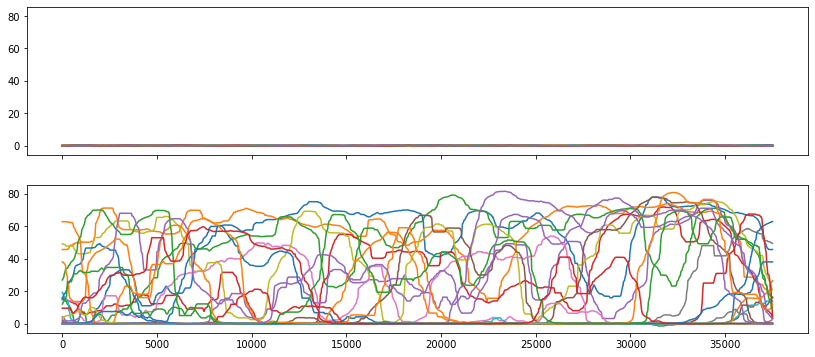

In [5]:
run_proportions = []
    
running = block.annotations['running']

fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(14,6))
    
for i_seg in range(len(block.segments)):
    # get running speed for segment
    data = block.segments[i_seg].analogsignals[1]
    speed = data.magnitude
        
    state = block.segments[i_seg].annotations['running']
        
    if state:
        run_proportions.append(sum(np.hstack(speed) > 1)/len(np.hstack(speed)))

    # plot speed
    ax[int(state)].plot(speed)
        
# print number of running and stationary segments
print(f"Running segments: {int(np.sum(running))}")
print(f"Stationary segments: {int(len(running)-np.sum(running))}")
print(f"Proportions of time running in run segments: \n{run_proportions}")
print(f"Average proportion: {np.mean(run_proportions)}")

Analyzing: 768515987_natural_movie.pkl
Running segments: 33
Stationary segments: 27
Proportions of time running in run segments: 

[0.12442666666666667, 0.6541333333333333, 0.3672, 0.86456, 0.5517066666666667, 0.4053866666666667, 0.32554666666666665, 0.53424, 0.3334933333333333, 0.41154666666666667, 0.30248, 0.4521866666666667, 0.31690666666666667, 1.0, 0.06176, 0.08725333333333334, 0.62304, 0.20981333333333332, 0.049813333333333334, 0.08216, 0.05408, 0.25032, 0.4138133333333333, 0.39450666666666667, 0.58984, 0.25261333333333336, 0.6379733333333333, 0.49338666666666664, 0.06416, 0.42504, 0.77344, 0.29893333333333333, 0.06245333333333333]

Average proportion: 0.37782464646464653


Analyzing: 787025148_natural_movie.pkl
Running segments: 25
Stationary segments: 35
Proportions of time running in run segments: 

[0.9608266666666667, 1.0, 0.9874133333333334, 0.92136, 0.7935466666666666, 0.12402666666666666, 0.7245333333333334, 0.16970666666666667, 0.9909066666666667, 0.08245333333333334, 0.

Running segments: 27
Stationary segments: 33
Proportions of time running in run segments: 

[0.08122666666666667, 0.08837333333333333, 0.03589333333333333, 0.07386666666666666, 0.09058666666666666, 0.07250666666666666, 0.07077333333333333, 0.7665066666666667, 0.15821333333333334, 0.37133333333333335, 0.15413333333333334, 0.3297333333333333, 0.29312, 0.3118666666666667, 0.016693333333333334, 0.43090666666666666, 0.45869333333333334, 0.36373333333333335, 0.49568, 0.11565333333333333, 0.03912, 0.12202666666666667, 0.26288, 0.4420266666666667, 0.5022933333333334, 0.10645333333333333, 0.21181333333333333]

Average proportion: 0.23948543209876544


Analyzing: 831882777_natural_movie.pkl
Running segments: 60
Stationary segments: 0
Proportions of time running in run segments: 

[0.9716, 0.98952, 0.98984, 0.9876266666666667, 1.0, 0.9677066666666667, 1.0, 0.9816266666666666, 0.9262933333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

C:\Users\soysa\Anaconda3\envs\Allen\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


Running segments: 38
Stationary segments: 22
Proportions of time running in run segments: 

[1.0, 0.7070933333333334, 0.6056533333333334, 0.7572533333333333, 0.28448, 0.05824, 0.03661333333333333, 0.23242666666666667, 0.5629333333333333, 0.7804266666666667, 1.0, 0.10005333333333333, 0.2886666666666667, 0.15402666666666667, 0.9906666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9796, 1.0, 1.0]

Average proportion: 0.8036350877192983


Analyzing: 767871931_natural_movie.pkl
Running segments: 15
Stationary segments: 45
Proportions of time running in run segments: 

[0.1492, 0.7730933333333333, 1.0, 0.59256, 0.37621333333333334, 1.0, 1.0, 0.45021333333333335, 0.33813333333333334, 0.5338133333333334, 0.40498666666666666, 1.0, 1.0, 0.1796, 0.0692]

Average proportion: 0.5911342222222223




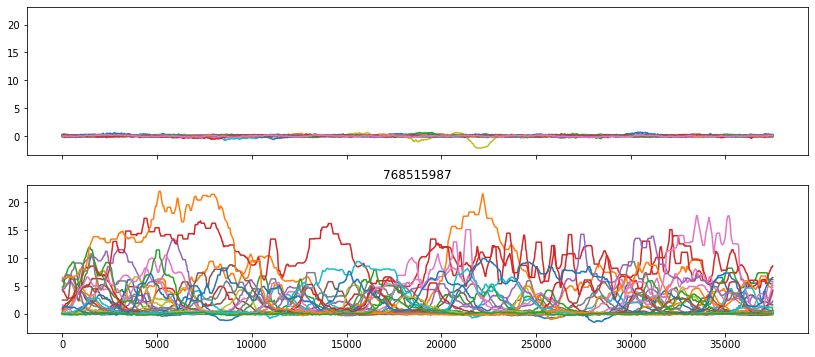

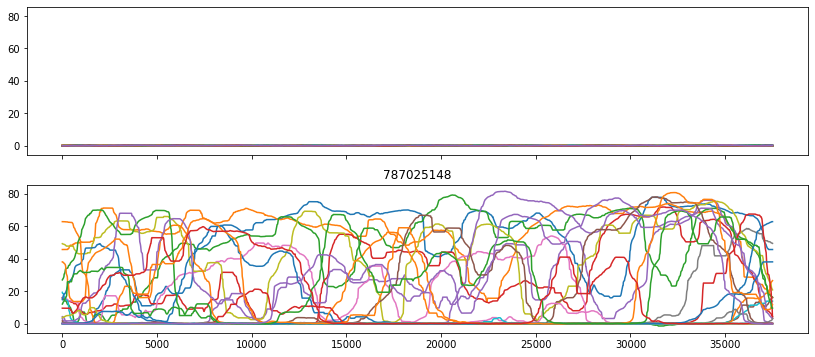

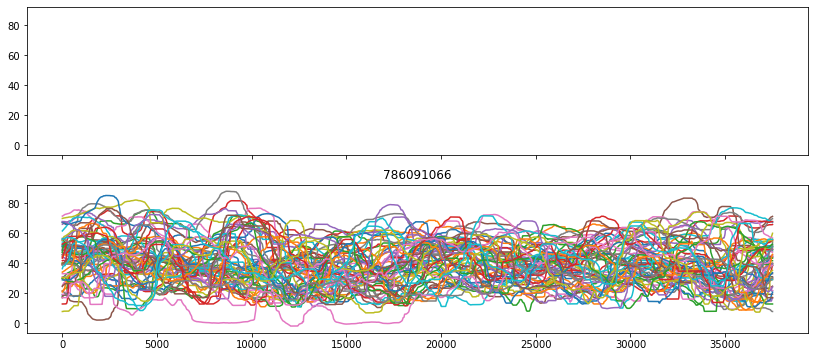

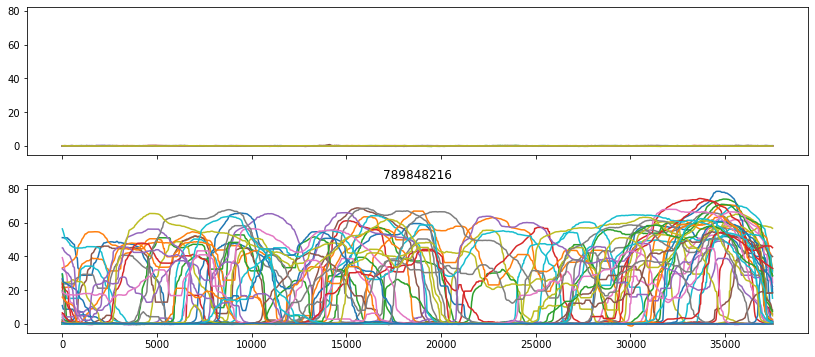

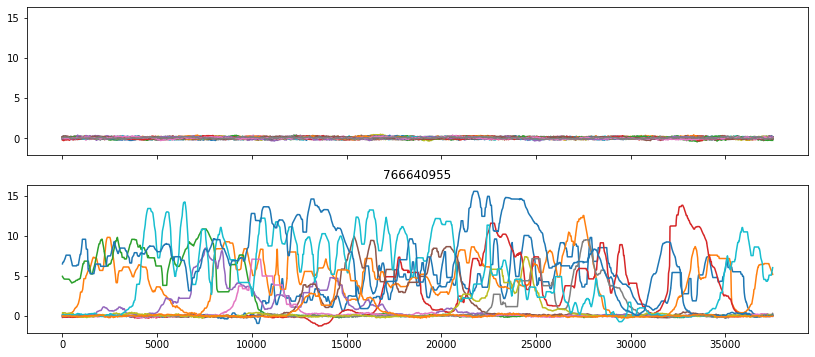

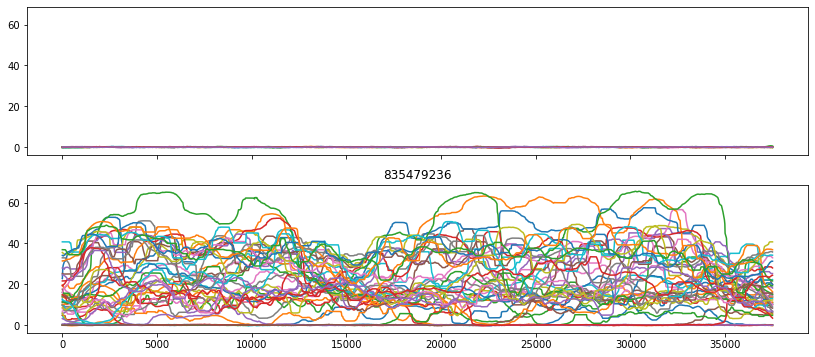

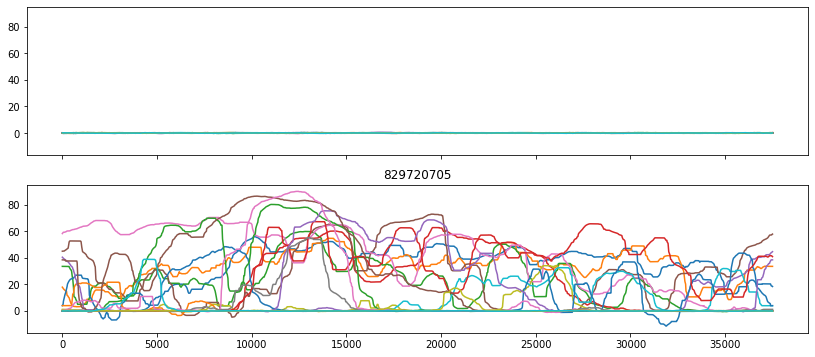

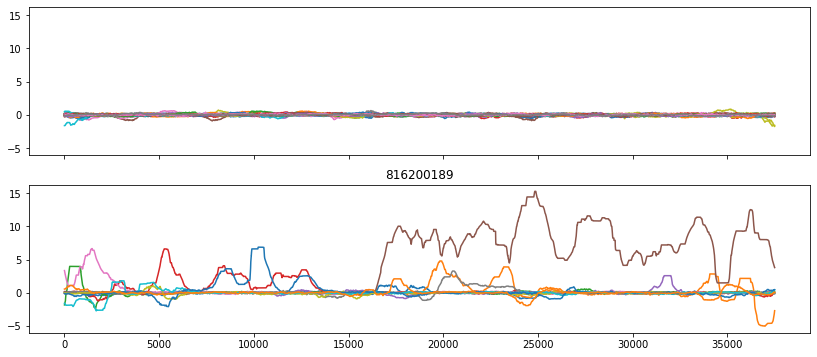

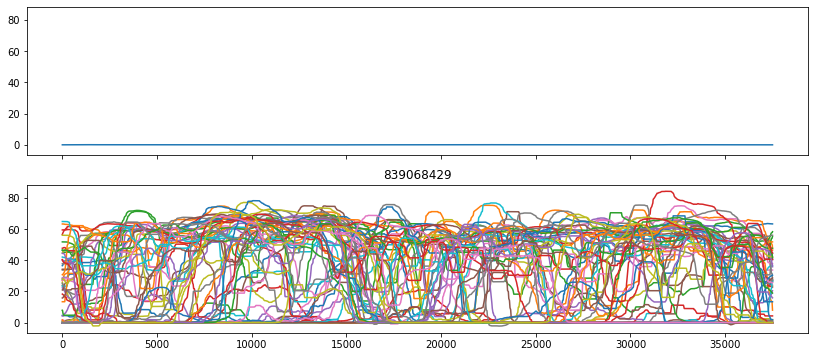

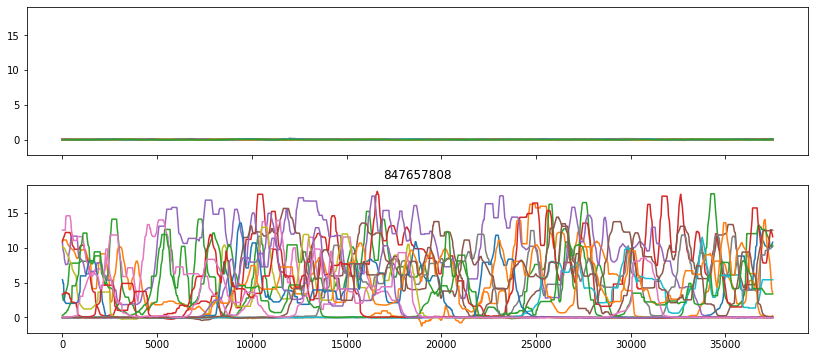

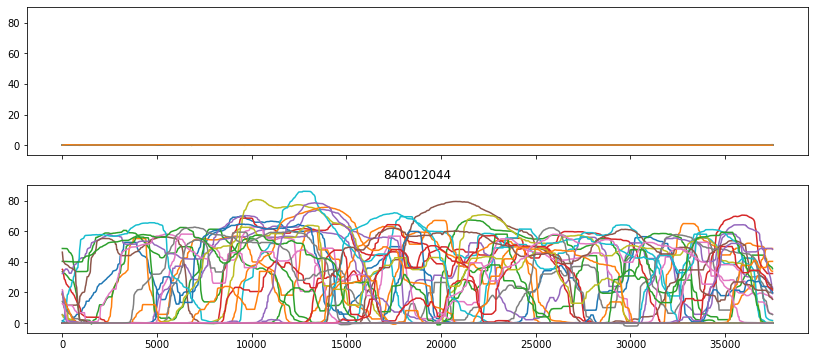

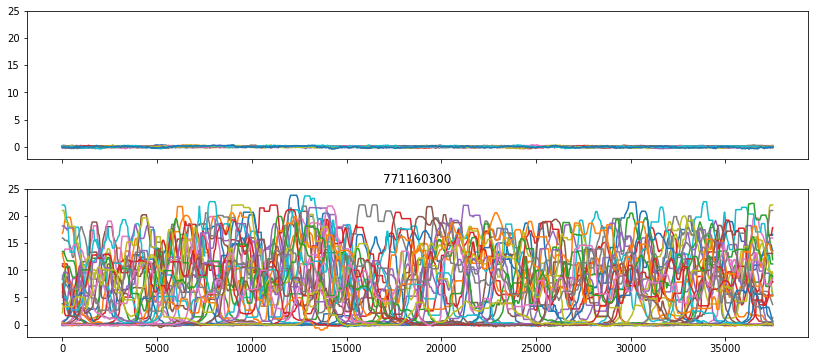

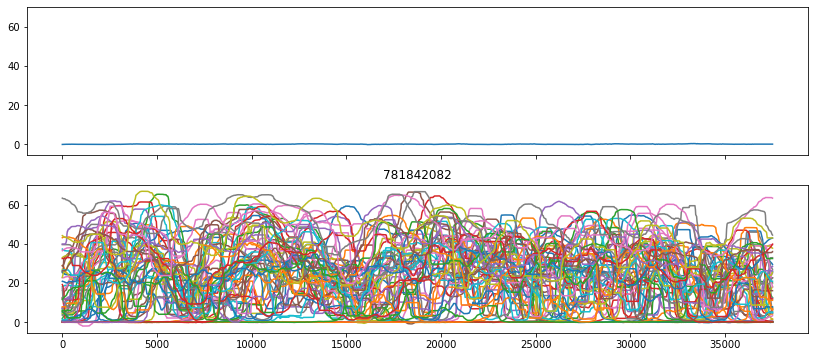

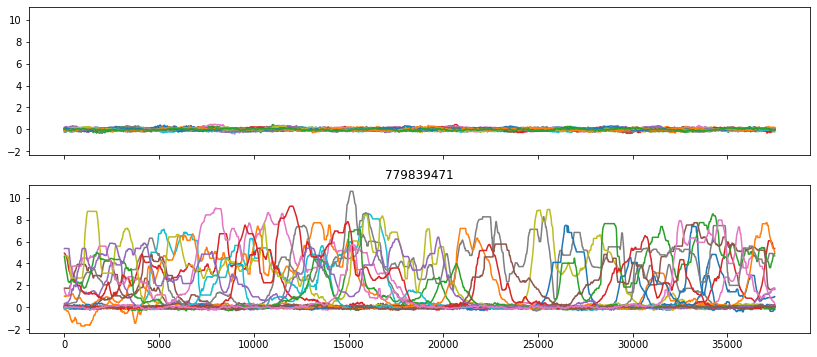

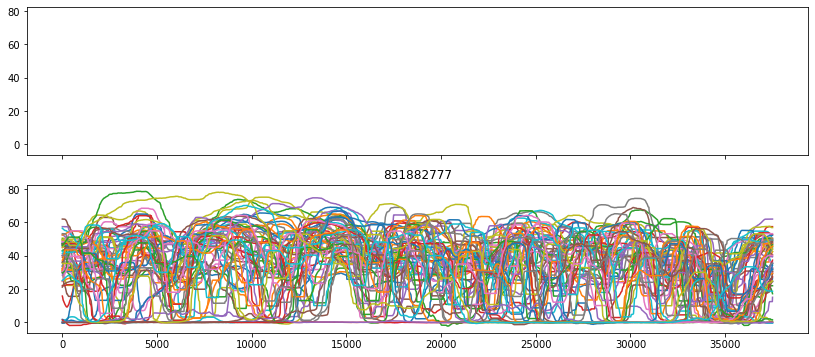

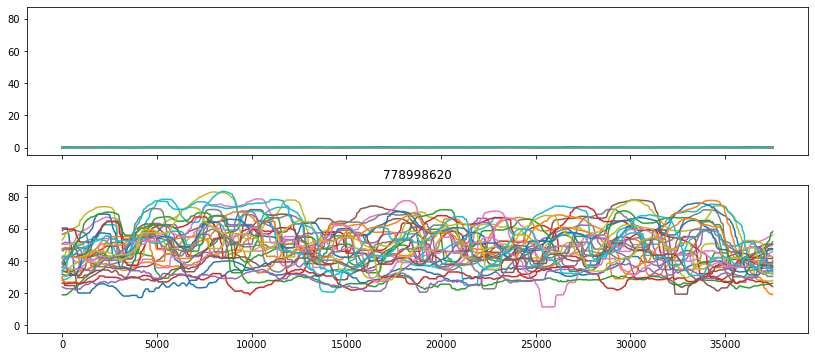

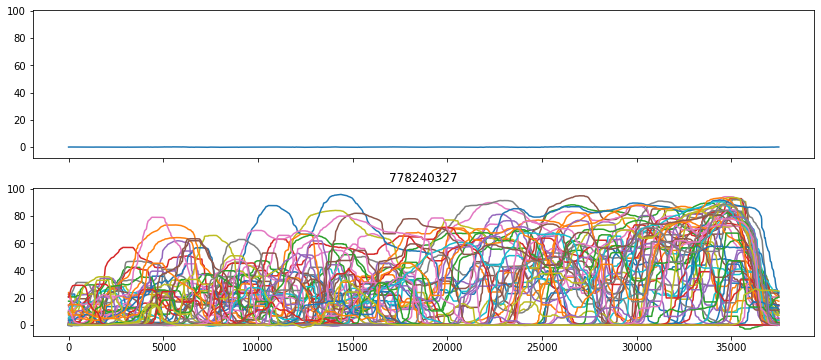

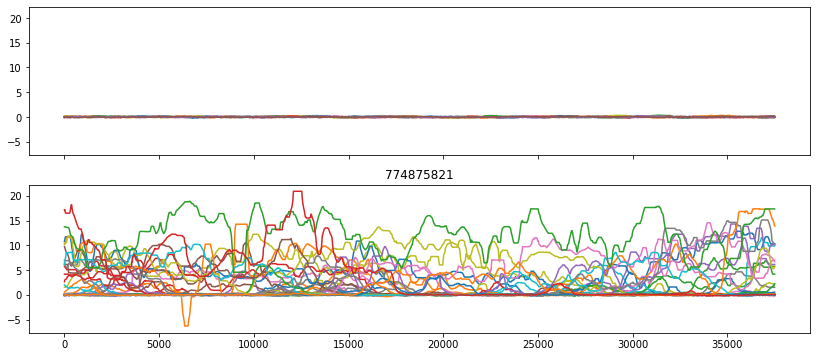

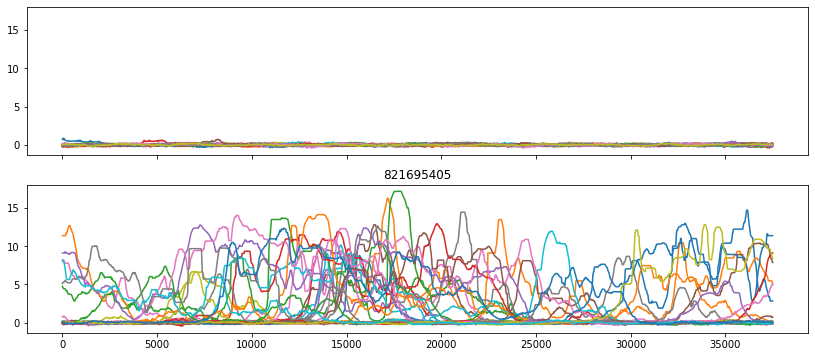

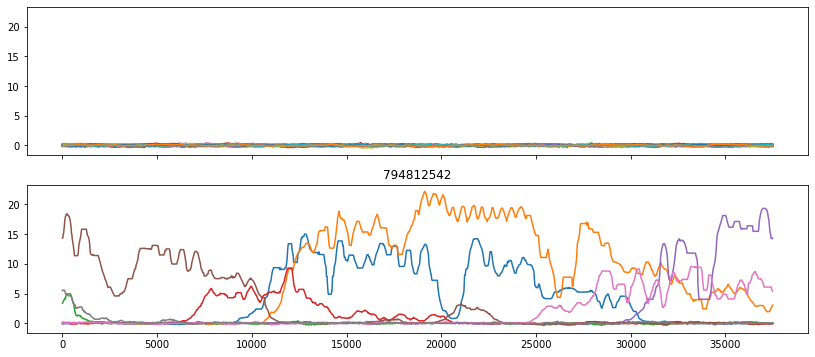

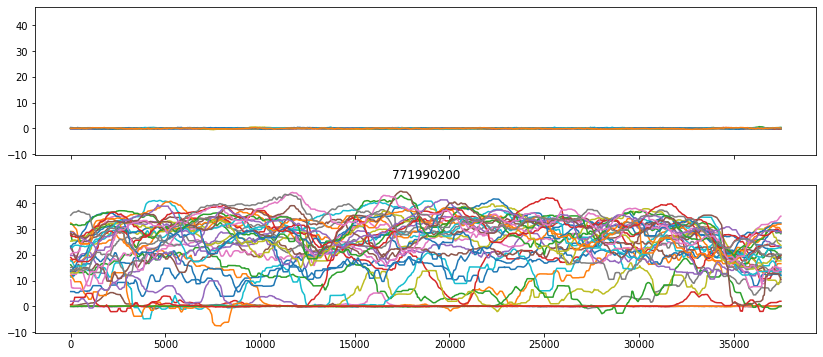

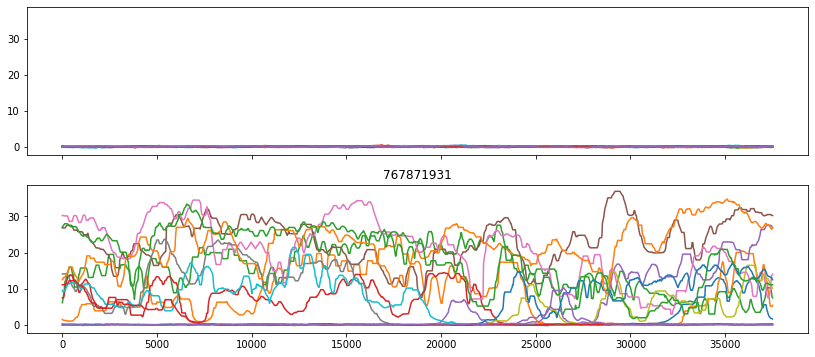

In [15]:
BLOCKS_IN = "G:/Shared drives/visual_encoding/data/blocks"

for file in os.listdir(BLOCKS_IN):
    
    if file[-9:] != "movie.pkl":
        continue
        
    print(f"Analyzing: {file}")
    
    block = pd.read_pickle(BLOCKS_IN + '/' + file)
    
    run_proportions = []
    running = block.annotations['running']
    
    fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(14,6))
    
    for i_seg in range(len(block.segments)):
        # get running speed for segment
        data = block.segments[i_seg].analogsignals[1]
        speed = data.magnitude
        
        state = block.segments[i_seg].annotations['running']
        
        if state:
            run_proportions.append(sum(np.hstack(speed) > 1)/len(np.hstack(speed)))

        # plot speed
        ax[int(state)].plot(speed)
        
    # print number of running and stationary segments
    print(f"Running segments: {int(np.sum(running))}")
    print(f"Stationary segments: {int(len(running)-np.sum(running))}")
    print(f"Proportions of time running in run segments: \n\n{run_proportions}\n")
    print(f"Average proportion: {np.mean(run_proportions)}\n\n")
    
    plt.title(file.split("_")[0])

# Look at LFP/spike metrics split by behavioral state

In [4]:
# custom imports
import sys
sys.path.append(REPO_PATH)
from allen_vc.analysis import channel_medians, avg_psd_over_freq_ranges, \
create_r_matrix, sensitivity_analysis
from allen_vc.plts import linregress_movie_v_shuffled_plot, plot_sa_heat_map

print("Imported!")

Imported!


In [5]:
movie_spikes = pd.read_csv(f'{PROJECT_PATH}/{SPIKES_IN}/VISp-LGd_natural_movie.csv')
movie_lfp = pd.read_csv(f'{PROJECT_PATH}/{LFP_IN}/natural_movie/all_params.csv').drop(columns="Unnamed: 0").drop(columns="Unnamed: 0.1")

In [6]:
shuffled_spikes = pd.read_csv(f'{PROJECT_PATH}/{SPIKES_IN}/VISp-LGd_natural_movie_shuffled.csv')
shuffled_lfp = pd.read_csv(f'{PROJECT_PATH}/{LFP_IN}/natural_movie_shuffled/lfp_params.csv').drop(columns="Unnamed: 0")

In [19]:
def combine_spike_lfp_dfs(spike_df, lfp_df, ses_id, region, state=None):
    
    # filter region
    reg_spike_df = spike_df[spike_df.get("brain_structure")==region]

    # filter session
    ses_spike_df = reg_spike_df[reg_spike_df.get("session")==ses_id]
    ses_lfp_df = lfp_df[lfp_df.get("session")==ses_id]
    
    chan_med_lfp_df = channel_medians(ses_lfp_df, ses_lfp_df.columns).drop(columns="chan_idx")
    
    if state is not None:
        state_spike_df = ses_spike_df[ses_spike_df.get("running")==state]
        return chan_med_lfp_df.merge(state_spike_df)
    
    return chan_med_lfp_df.merge(ses_spike_df)

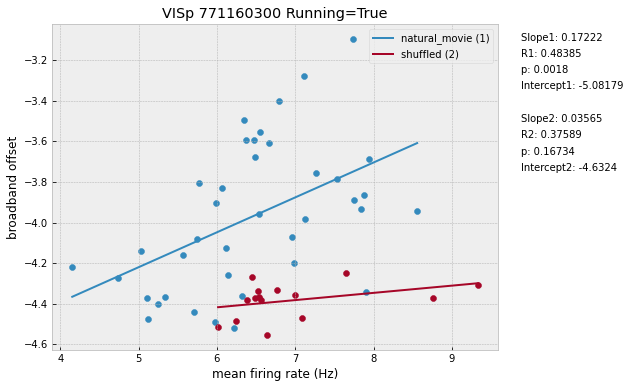

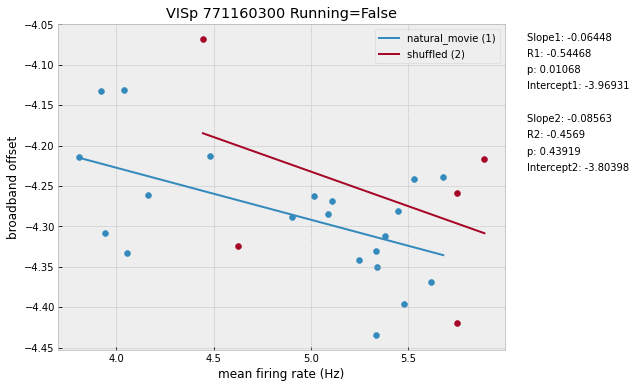

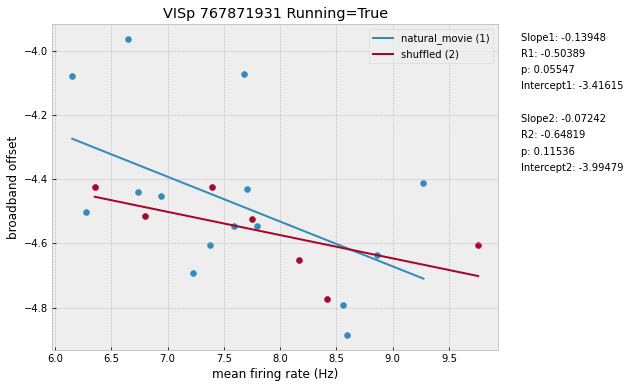

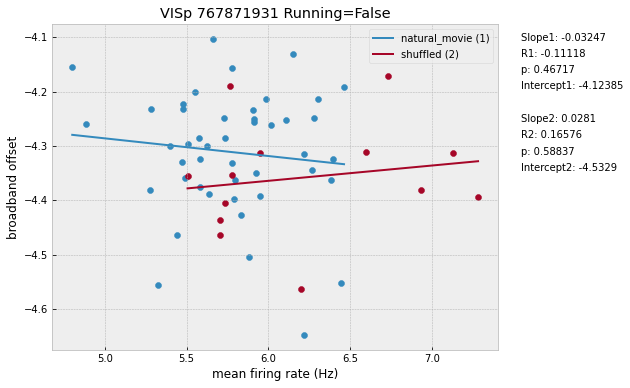

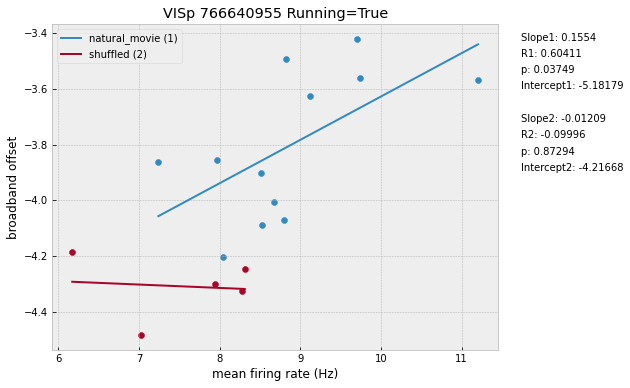

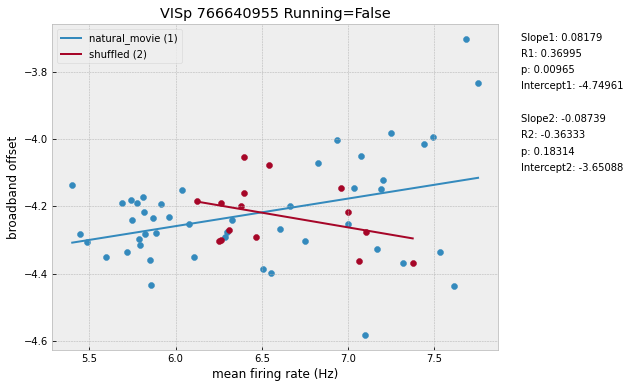

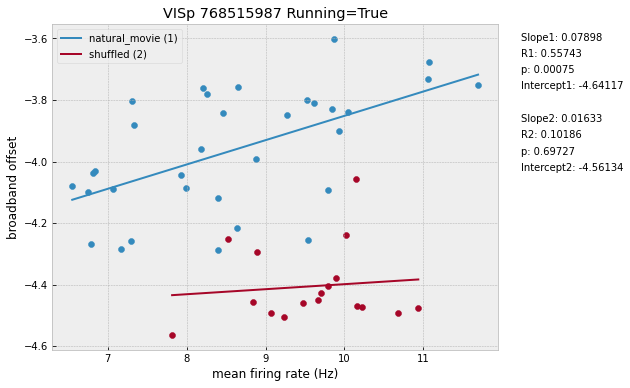

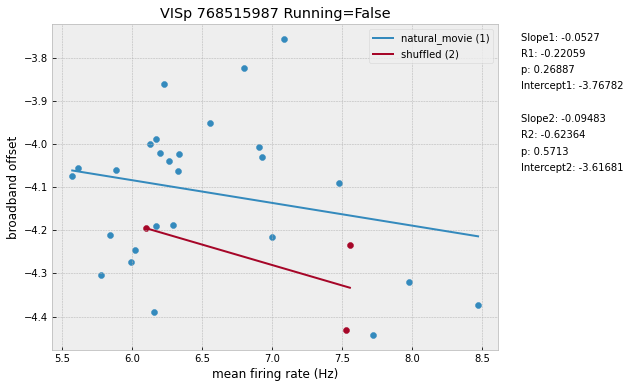

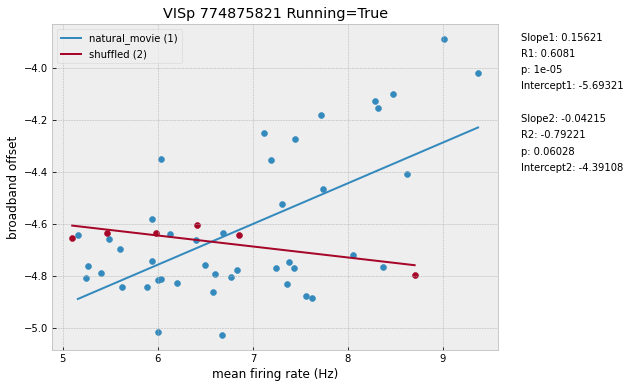

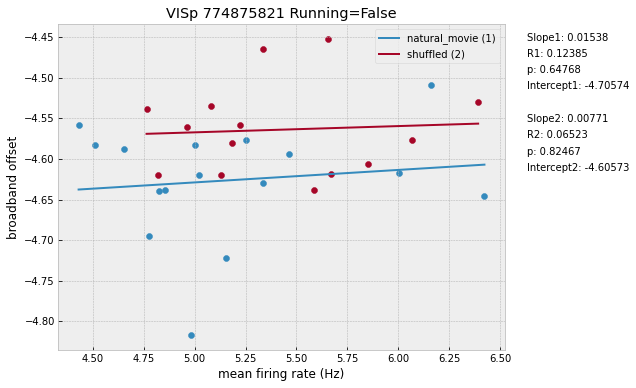

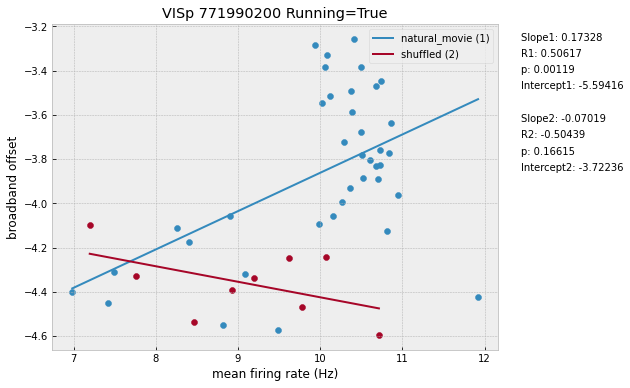

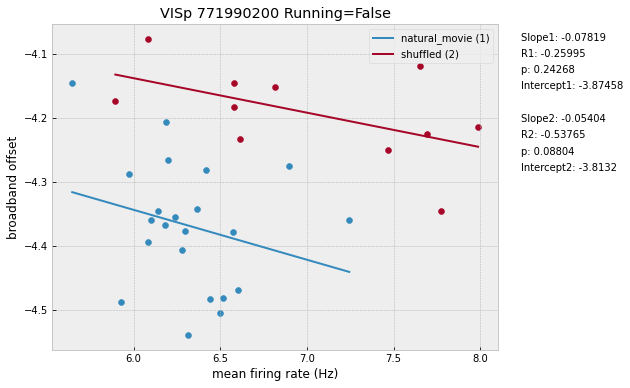

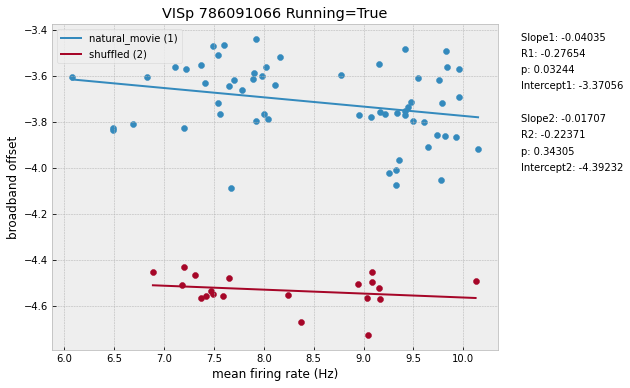

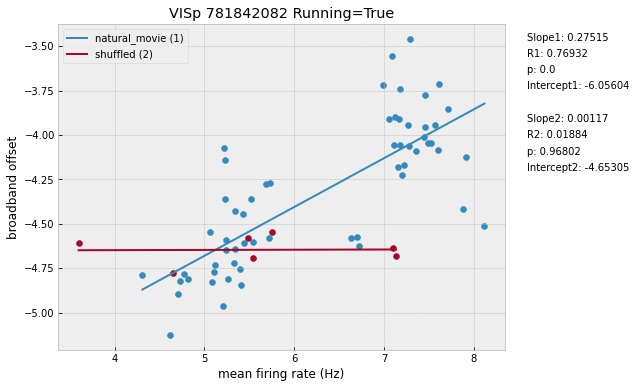

C:\Users\soysa\Anaconda3\envs\Allen\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\soysa\Anaconda3\envs\Allen\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\soysa\Anaconda3\envs\Allen\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


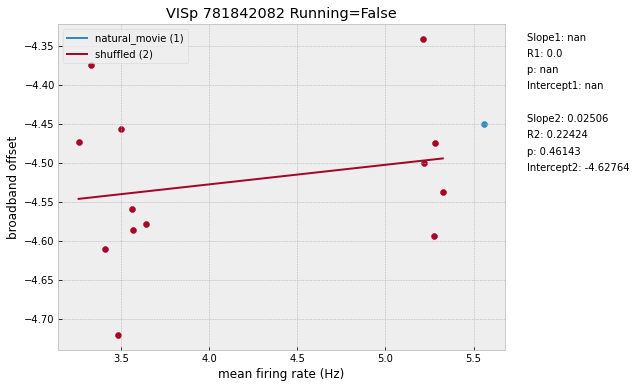

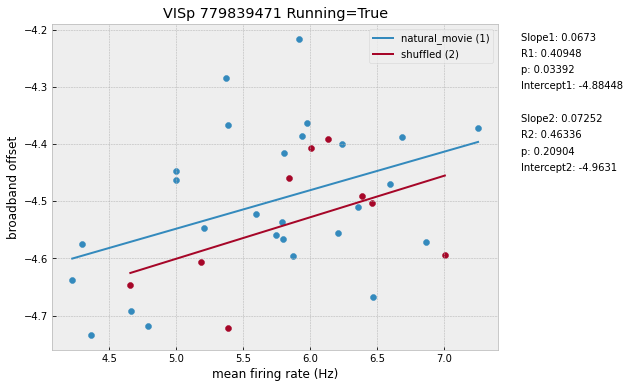

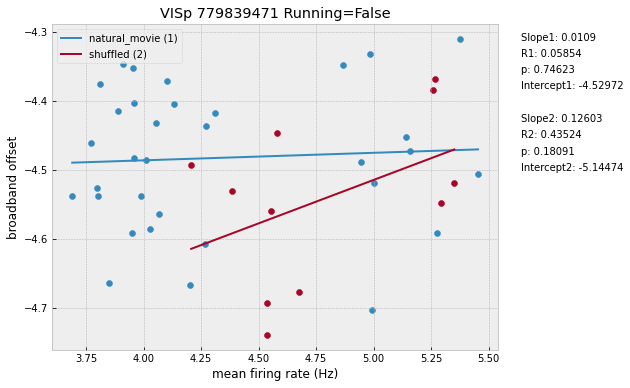

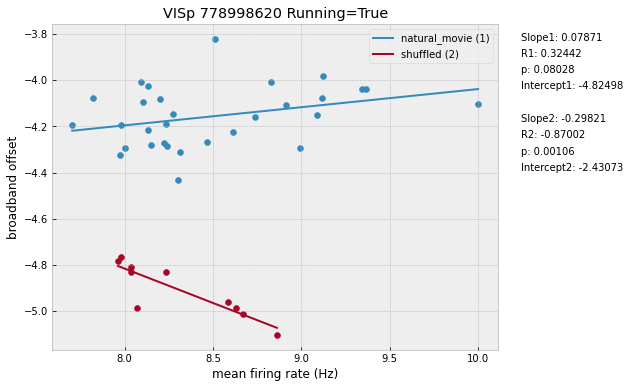

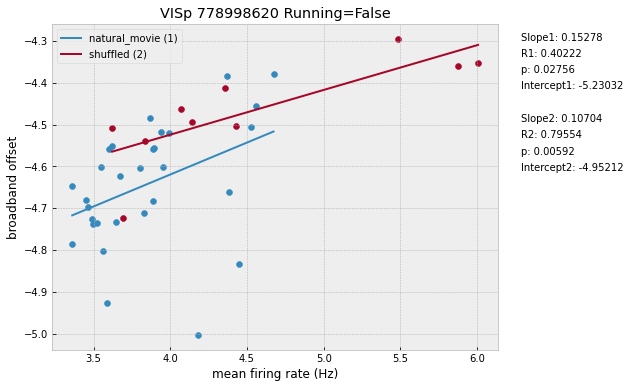

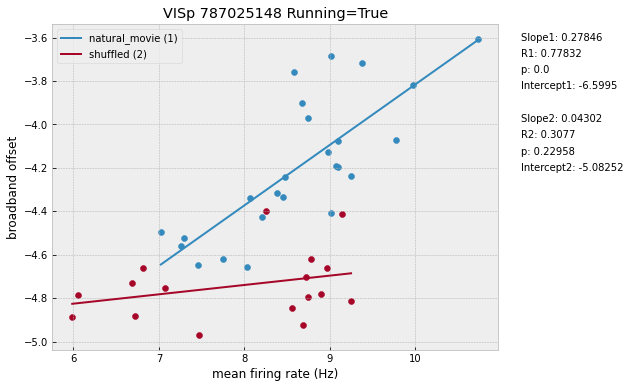

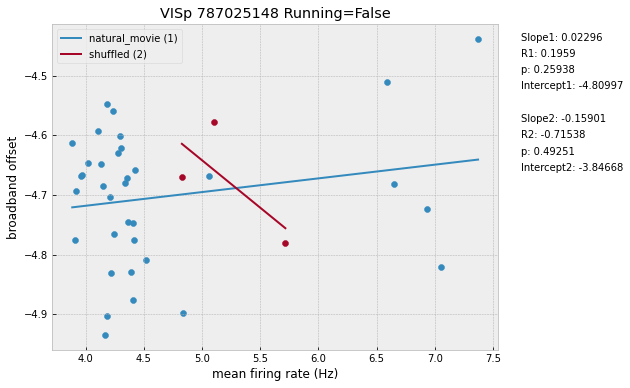

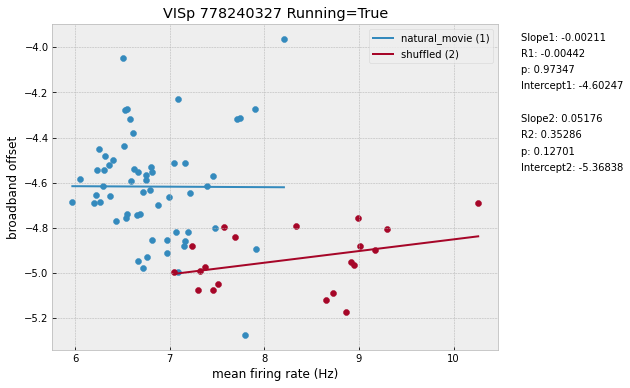

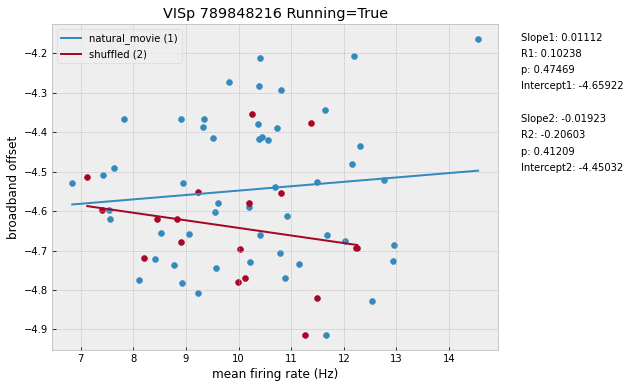

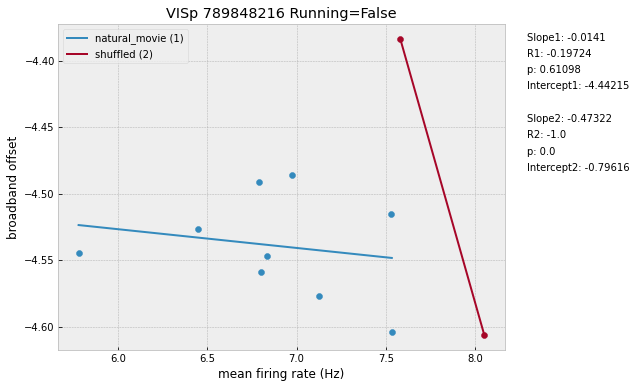

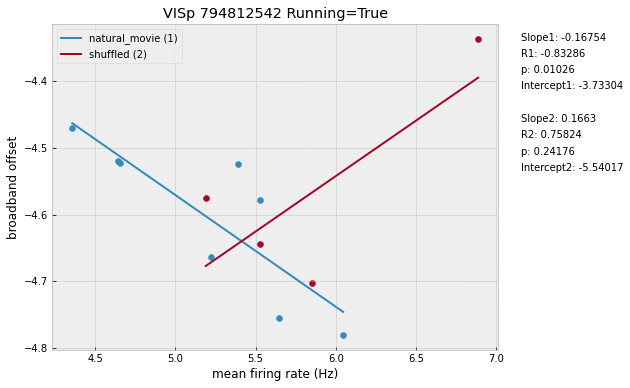

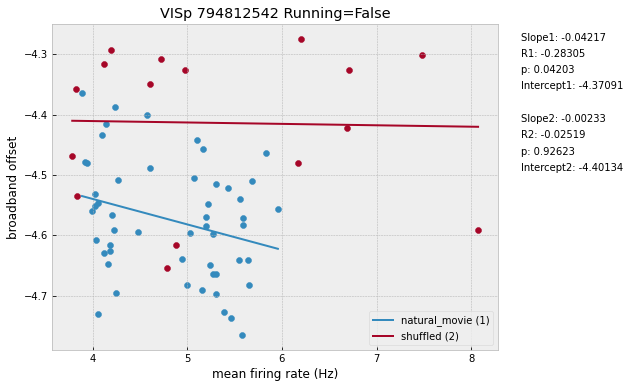

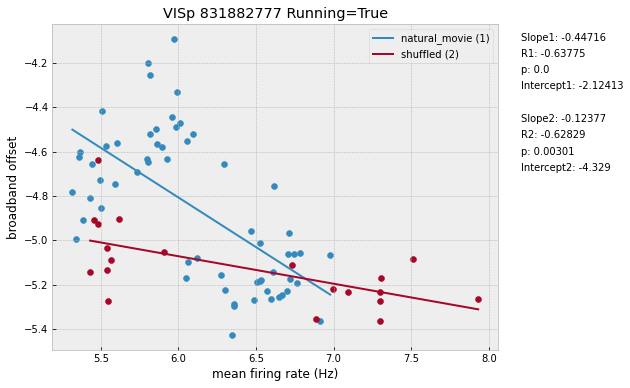

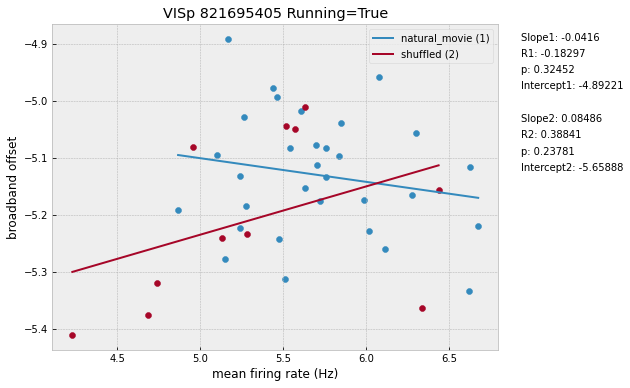

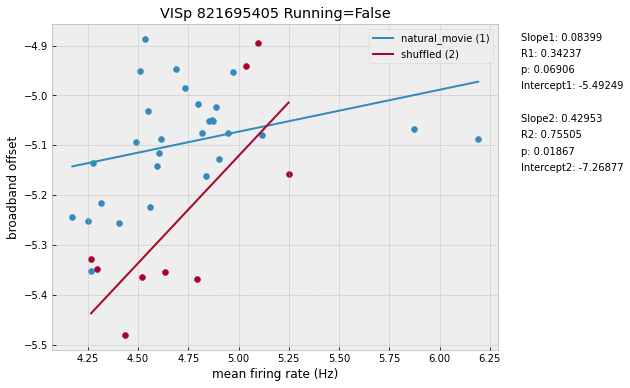

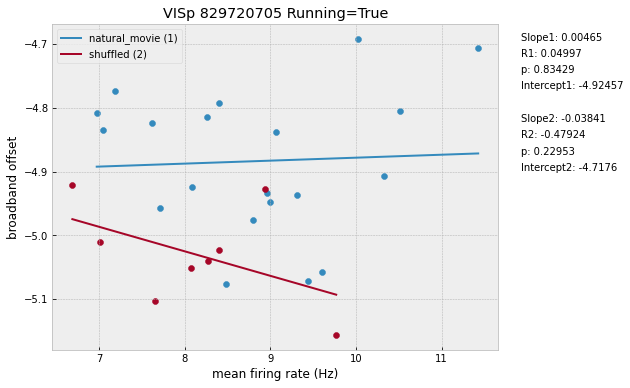

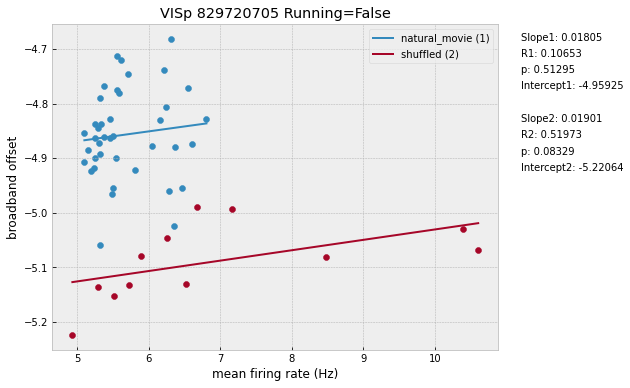

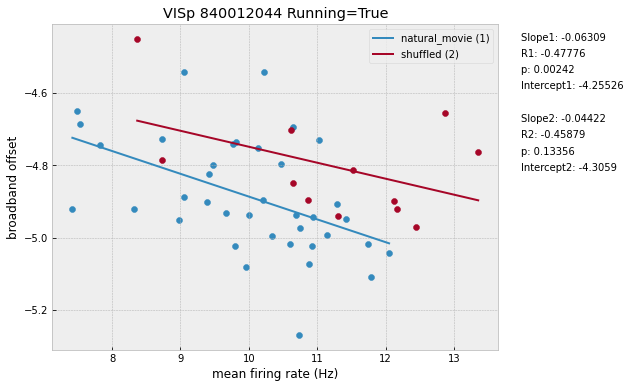

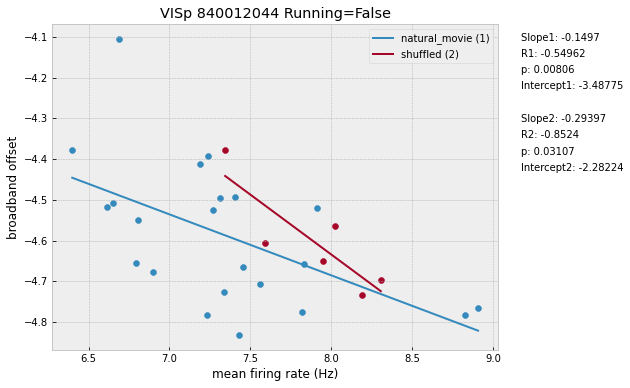

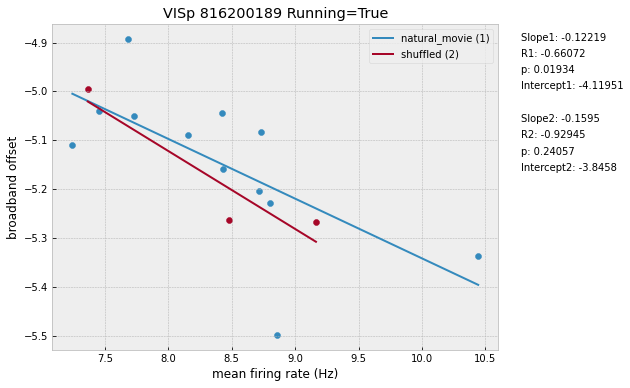

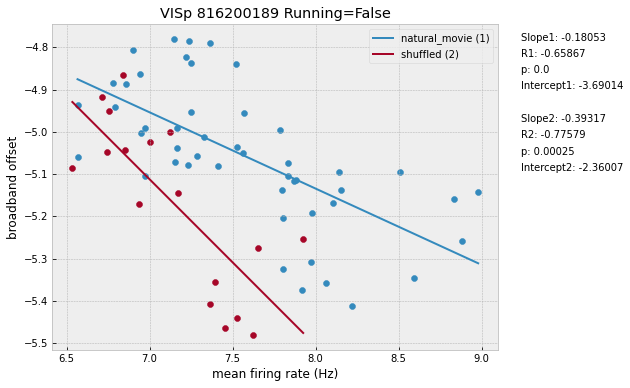

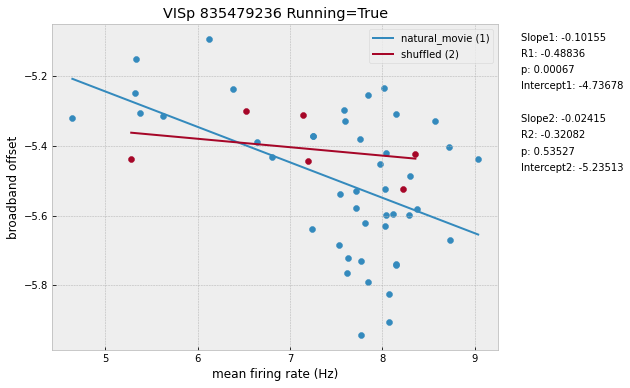

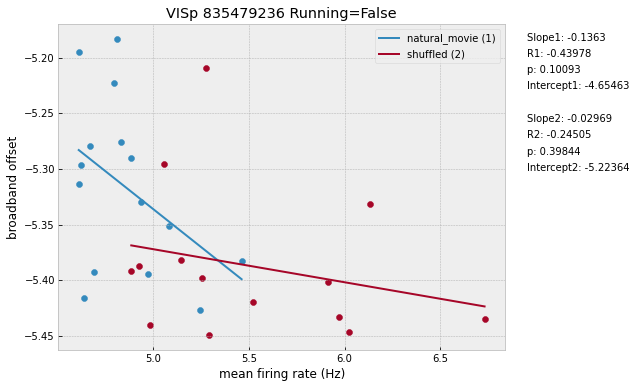

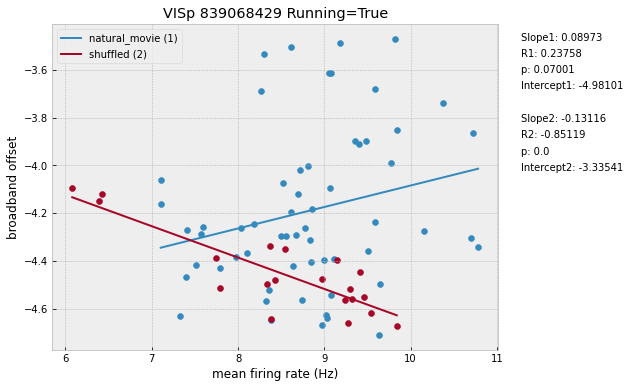

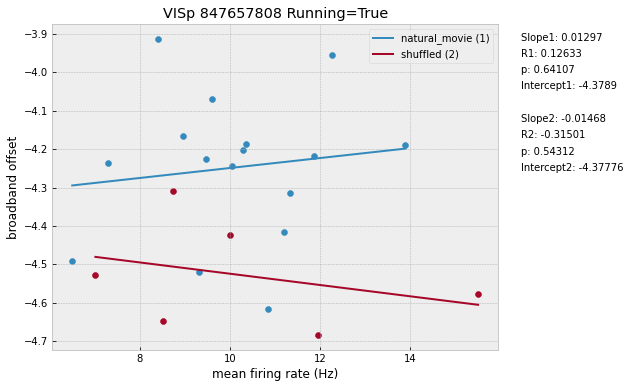

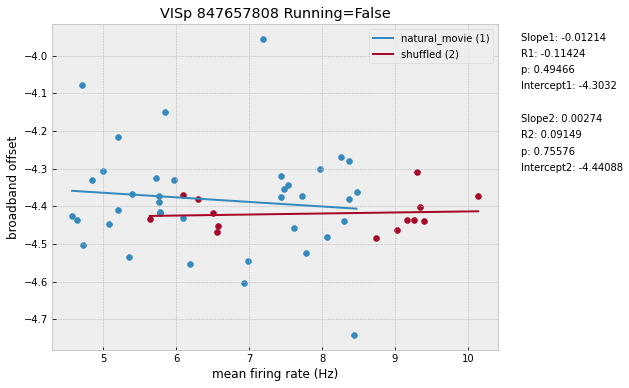

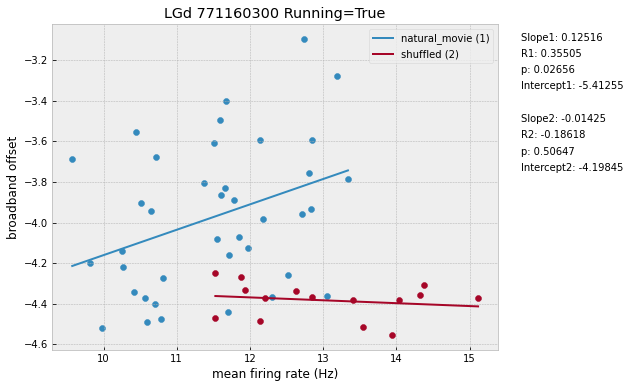

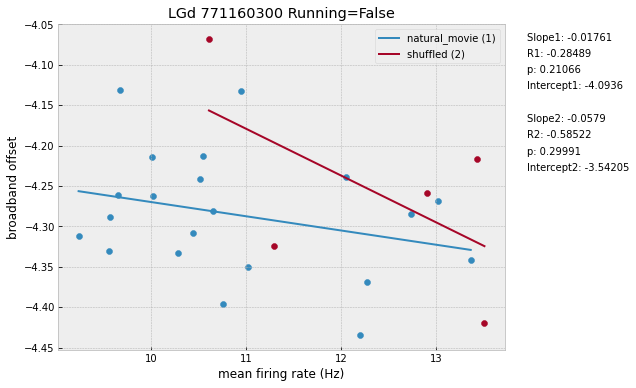

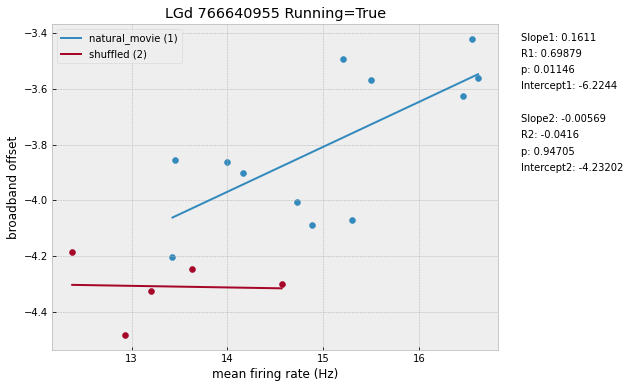

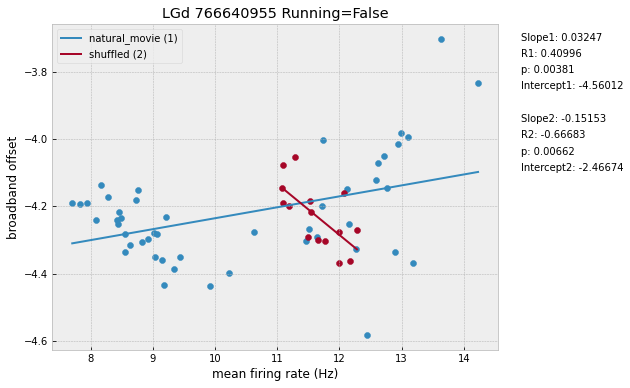

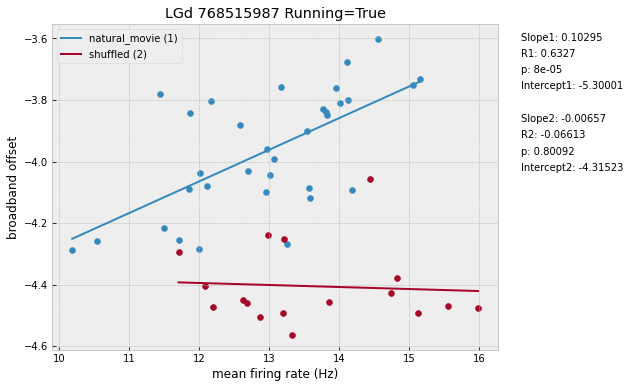

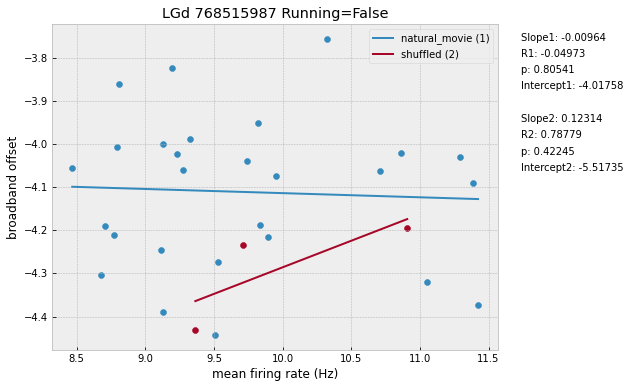

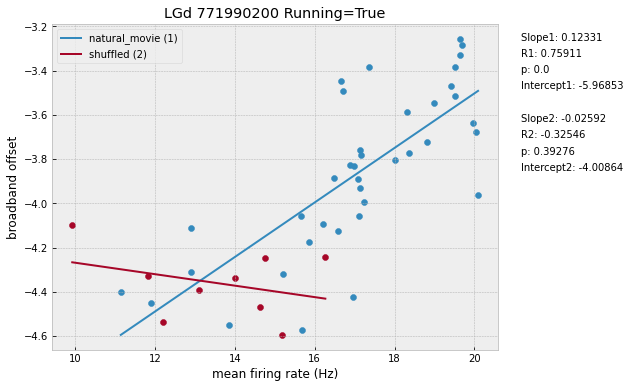

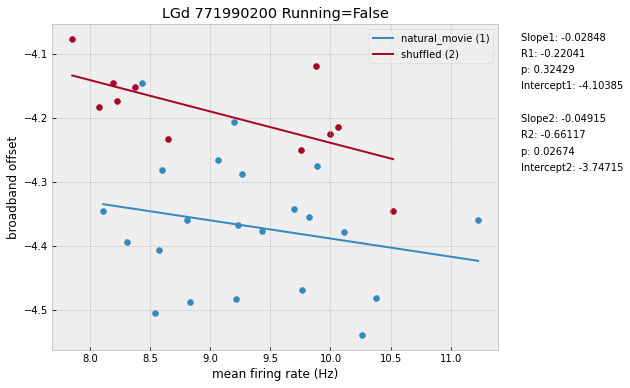

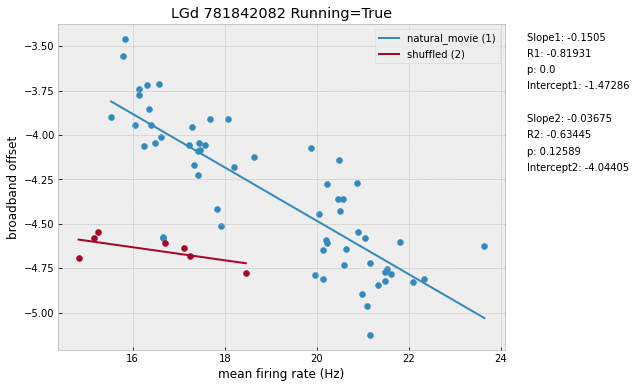

C:\Users\soysa\Anaconda3\envs\Allen\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\soysa\Anaconda3\envs\Allen\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\soysa\Anaconda3\envs\Allen\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


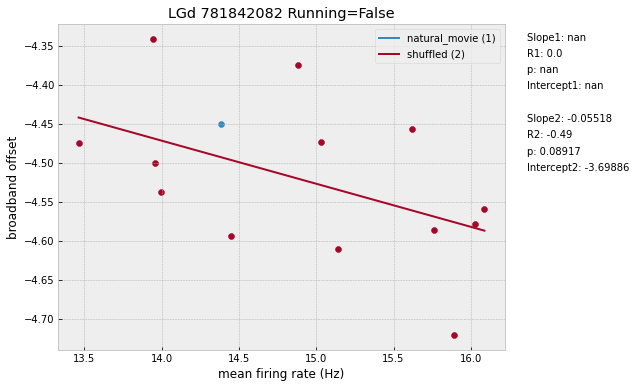

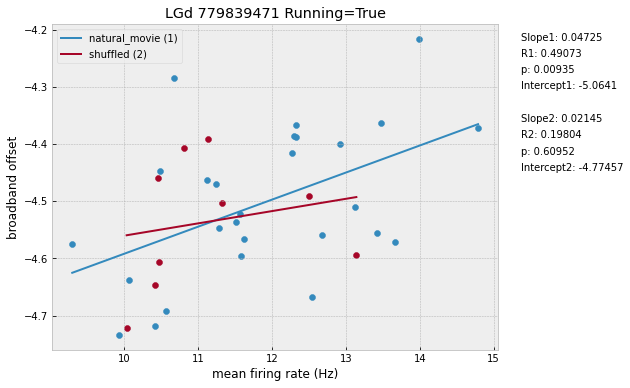

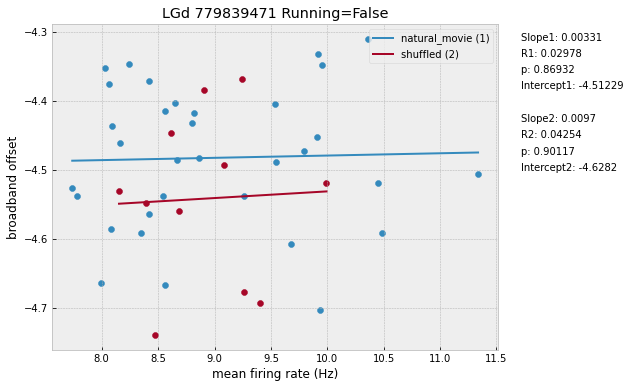

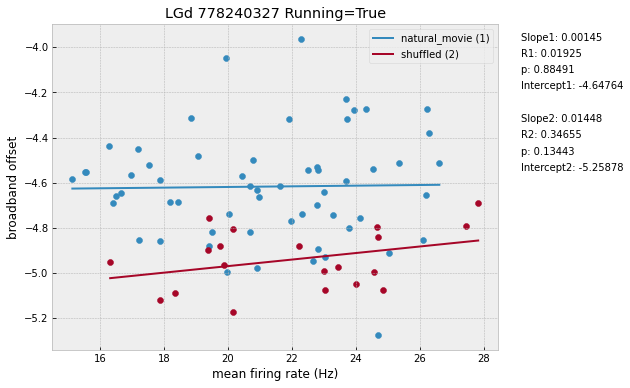

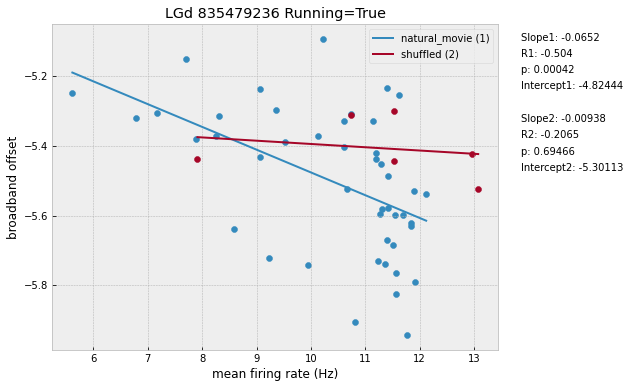

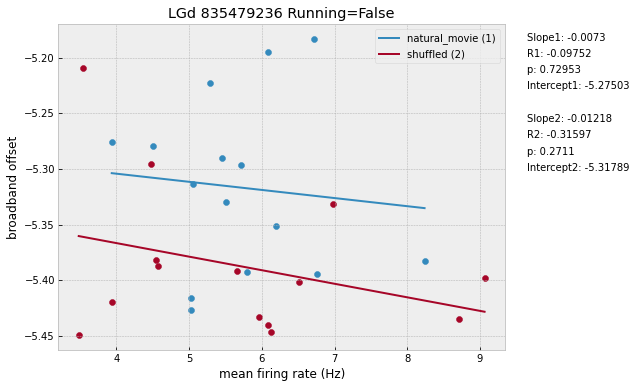

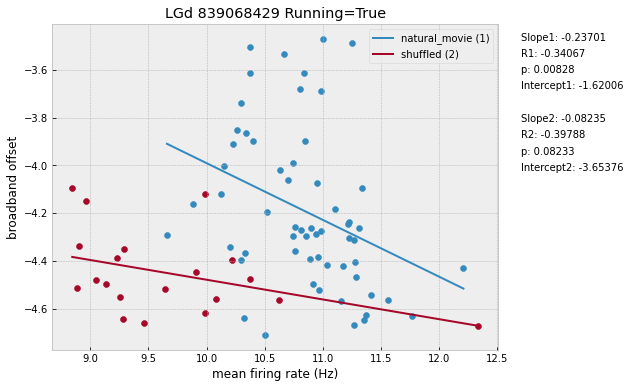

In [24]:
regions = ['VISp', 'LGd']

for region in regions:
    # iterate over each session and join dataframes
    for ses_id in movie_spikes.get('session').unique():
        
        if ses_id == 793224716 or ses_id not in movie_spikes\
        [movie_spikes.get('brain_structure')==region].get('session').unique():
            continue
        
        for running in [True, False]:
        
            # combine dfs with average across channels
            movie_lfp_sync = combine_spike_lfp_dfs(movie_spikes, movie_lfp, ses_id, region, state=running)
            
            # create plots
            x_movie = movie_lfp_sync.get('mean_firing_rate')
            y_movie = movie_lfp_sync.get('offset')

            # repeat for shuffled data
            shuffled_lfp_sync = combine_spike_lfp_dfs(shuffled_spikes, shuffled_lfp, ses_id, region, state=running)

            x_shuffled = shuffled_lfp_sync.get('mean_firing_rate')
            y_shuffled = shuffled_lfp_sync.get('offset')
            
            if len(movie_lfp_sync)==0 or len(shuffled_lfp_sync)==0:
                continue
            
            linregress_movie_v_shuffled_plot(x_movie, y_movie, x_shuffled, y_shuffled, 
                                             f"{region} {ses_id} Running={running}", "mean firing rate (Hz)", "broadband offset", 
                                             show=True);
            # add dir_figures to save

# Merge unit and LFP results

In [25]:
# modify df_lfp - average over channels for each epoch within each session

df_lfp = movie_lfp.groupby(['session', 'epoch_idx']).mean().reset_index()

# modify df_unit - drop non-VISp rows
df_units = movie_spikes.copy()
df_units = df_units[df_units.get("brain_structure")=="VISp"]    

# merge dataframes
movie_df = df_lfp.merge(df_units, on=['session', 'epoch_idx'])

#repeat for shuffled
df_lfp = shuffled_lfp.groupby(['session', 'epoch_idx']).mean().reset_index()
df_units = shuffled_spikes.copy()
df_units = df_units[df_units.get("brain_structure")=="VISp"]    
shuffled_df = df_lfp.merge(df_units, on=['session', 'epoch_idx'])

movie_df['condition'], shuffled_df['condition'] = 'movie', 'shuffled'

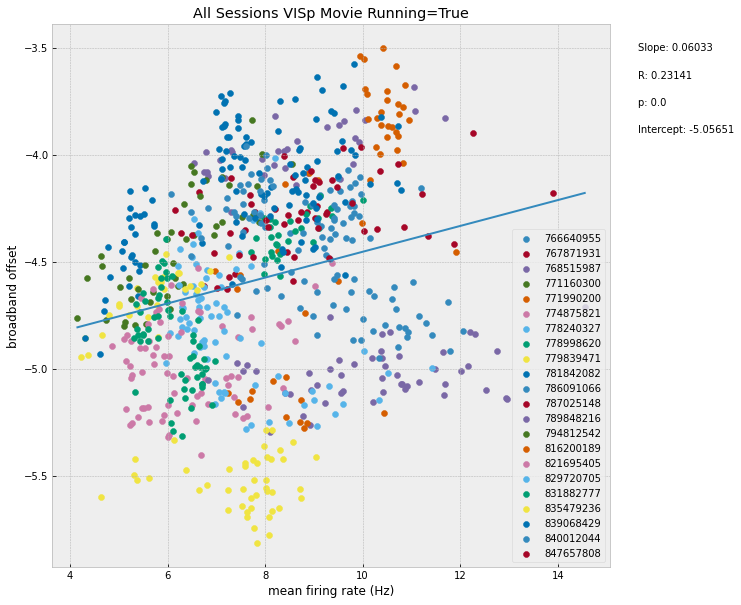

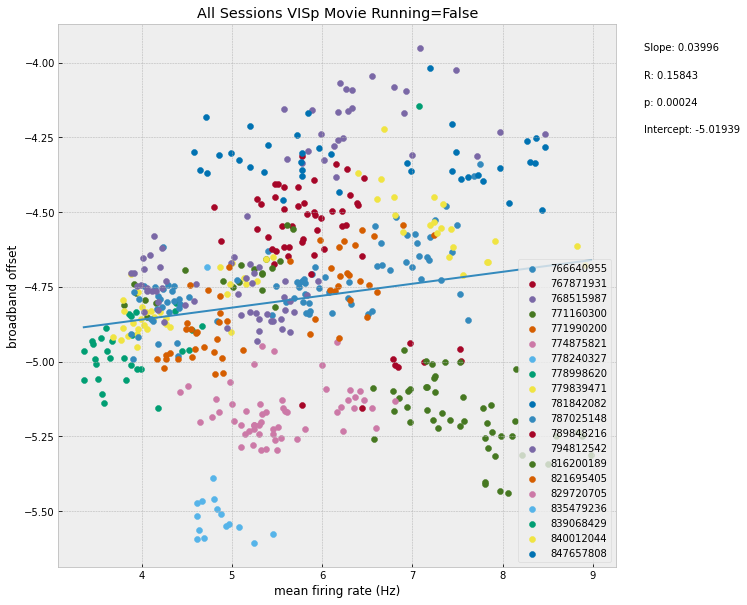

In [26]:
# Plot mean firing rate vs. broadband offset 

for running in [True, False]:
    #filter for behavior
    behav_df = movie_df[movie_df.get('running')==running]
    
    # plot each session
    sessions = behav_df.get('session').unique()
    fig, ax = plt.subplots(figsize=(10, 10))
    for ses in sessions:
        ses_df = behav_df[behav_df.get('session')==ses]
        ax.scatter(ses_df.get('mean_firing_rate'), ses_df.get('offset'), label=ses)
    ax.legend()

    # run regression across all epochs and plot results
    x_data = behav_df.get('mean_firing_rate')
    y_data = behav_df.get('offset')
    results = sts.linregress(x_data, y_data)
    l1 = np.linspace(min(x_data), max(x_data), 1000)
    t1 = results.slope * l1 + results.intercept
    ax.plot(l1, t1, label='natural_movie (1)')

    # add labels
    plt.text(1.05, 0.95, f"Slope: {round(results.slope, 5)}", transform = ax.transAxes)
    plt.text(1.05, 0.9, f"R: {round(results.rvalue, 5)}", transform = ax.transAxes)
    plt.text(1.05, 0.85, f"p: {round(results.pvalue, 5)}", transform = ax.transAxes)
    plt.text(1.05, 0.8, f"Intercept: {round(results.intercept, 5)}", transform = ax.transAxes)

    plt.xlabel("mean firing rate (Hz)")
    plt.ylabel("broadband offset")

    plt.title(f"All Sessions VISp Movie Running={running}")

    #plt.savefig(f"{dir_figures}/movie_all_sessions")

In [28]:
df = pd.concat([movie_df, shuffled_df])
print(len(df))
df.head()

1752


session  epoch_idx    offset         knee  exponent  r_squared  \
0  766640955        0.0 -4.860576  1188.476113  1.938520   0.920563   
1  766640955        1.0 -4.840959   243.044655  1.958613   0.928544   
2  766640955        2.0 -4.734913   448.006152  2.018242   0.929696   
3  766640955        3.0 -4.808460   120.219652  1.976962   0.929683   
4  766640955        4.0 -4.841887   410.098697  1.968394   0.929065   

        cf_0      pw_0      bw_0        cf_1  ...  mean_firing_rate  \
0  16.315592  0.527971  4.110032   67.971192  ...          7.613462   
1  16.089610  0.408364  4.154759   77.684014  ...          6.503846   
2  20.044242  0.327437  3.952711   68.648654  ...          5.717949   
3  14.305838  0.325696  6.565642  111.696998  ...          6.325000   
4  30.627458  0.353131  4.655083   83.828503  ...          5.859615   

                                   unit_firing_rates  \
0  [9.933333333333334, 4.866666666666666, 2.3, 0....   
1  [12.866666666666667, 3.033333333333333, 1.9333...   
2  [7.333333333333333, 2.433333333333333, 1.83333...   
3  [5.066666666666666, 2.5, 1.4, 0.36666666666666...   
4  [6.433333333333334, 2.933333333333333, 1.53333...   

   coefficient_of_variation  spike_distance  spike_synchrony  \
0                  1.397554        0.373022         0.166795   
1                  1.805933        0.356343         0.156179   
2                  2.085702        0.355914         0.144663   
3                  2.286680        0.356209         0.150416   
4                  1.927220        0.360086         0.148029   

                             correlation_coefficient  \
0  [[ 1.          0.06956156  0.03174138 ...  0.0...   
1  [[ 1.          0.28654797 -0.11920837 ... -0.2...   
2  [[ 1.          0.52801102 -0.43696716 ... -0.2...   
3  [[ 1.          0.30124503 -0.1708901  ... -0.2...   
4  [[ 1.          0.19865689 -0.15139859 ... -0.2...   

                                         epoch_times  running  \
0  [array(2297.21288415) * s, array(2327.21288415...    False   
1  [array(2327.23768415) * s, array(2357.23796415...    False   
2  [array(2357.26309415) * s, array(2387.26328415...    False   
3  [array(2387.28808415) * s, array(2417.28815415...    False   
4  [array(2417.31288415) * s, array(2447.31325415...    False   

   brain_structure  condition  
0             VISp      movie  
1             VISp      movie  
2             VISp      movie  
3             VISp      movie  
4             VISp      movie  

[5 rows x 29 columns]


Regression results: movie
LinregressResult(slope=0.06033467700116708, intercept=-5.056513910341158, rvalue=0.23140868920455726, pvalue=5.920700935370708e-11, stderr=0.009087981681878925, intercept_stderr=0.07316741587535051)

Regression results: shuffled
LinregressResult(slope=0.03963160347406887, intercept=-5.196369742585704, rvalue=0.2135046198573029, pvalue=0.0006784246472238718, stderr=0.011515355017634264, intercept_stderr=0.0948421754706596)


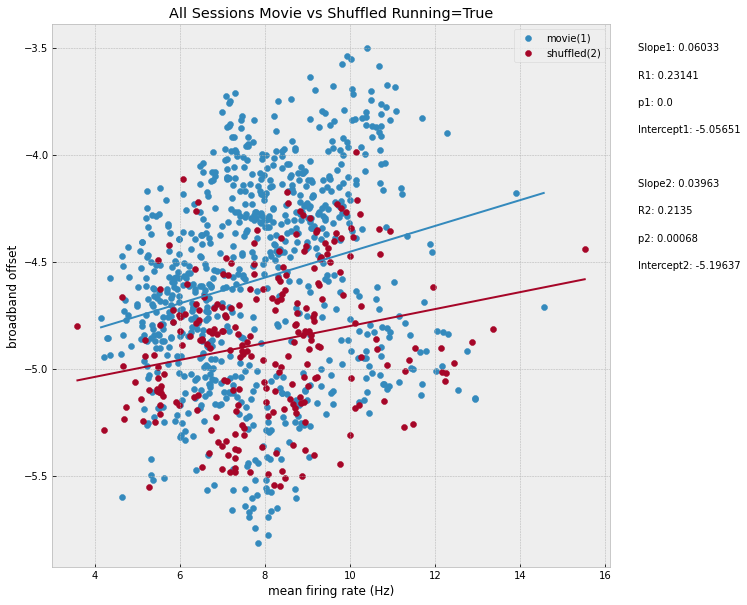


Regression results: movie
LinregressResult(slope=0.03995885921775576, intercept=-5.019391682161655, rvalue=0.15842855990576957, pvalue=0.00024043583504380415, stderr=0.010807182075857314, intercept_stderr=0.06298862672072494)

Regression results: shuffled
LinregressResult(slope=0.016888803729655462, intercept=-5.013598478106463, rvalue=0.07469706518793481, pvalue=0.3083036764555912, stderr=0.016531942225522487, intercept_stderr=0.10252155638513082)


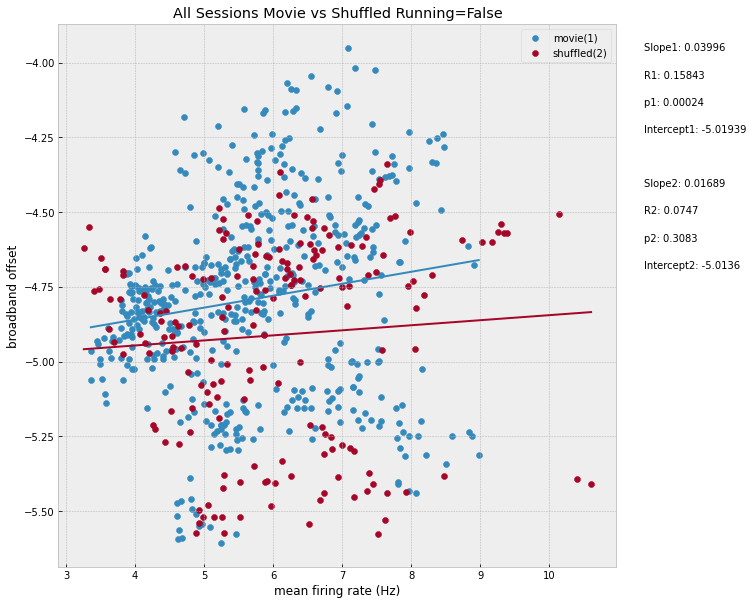

In [29]:
for running in [True, False]:
    #filter for behavior
    behav_df = df[df.get('running')==running]
    
    # plot mean firing rate vs. broadband offset for each condition

    # create figure and label axes
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlabel('mean firing rate (Hz)')
    ax.set_ylabel('broadband offset')
    plt.title(f"All Sessions Movie vs Shuffled Running={running}")

    # plot each condition
    for i, condition in enumerate(behav_df.get('condition').unique()):
        # plot scatter for each condition
        df_cond = behav_df[behav_df.get('condition')==condition]
        ax.scatter(df_cond.get('mean_firing_rate'), df_cond.get('offset'), label=condition + f"({i+1})")

        # run regression for both conditions and plot results
        x_data = df_cond.get('mean_firing_rate')
        y_data = df_cond.get('offset')
        results = sts.linregress(x_data, y_data)
        line_x = np.linspace(min(x_data), max(x_data), 1000)
        line_y = results.slope * line_x + results.intercept
        ax.plot(line_x, line_y)

        # print results
        print(f"\nRegression results: {condition}")
        print(results)

        # add labels
        plt.text(1.05, 0.95 - (i*0.25), f"Slope{i+1}: {round(results.slope, 5)}", transform = ax.transAxes)
        plt.text(1.05, 0.9 - (i*0.25), f"R{i+1}: {round(results.rvalue, 5)}", transform = ax.transAxes)
        plt.text(1.05, 0.85 - (i*0.25), f"p{i+1}: {round(results.pvalue, 5)}", transform = ax.transAxes)
        plt.text(1.05, 0.8 - (i*0.25), f"Intercept{i+1}: {round(results.intercept, 5)}", transform = ax.transAxes)

    # plt.savefig(f"{dir_figures}/movie_v_shuffled_all_sessions")

    # add legend
    ax.legend()
    plt.show();

In [ ]:
# ANOVA